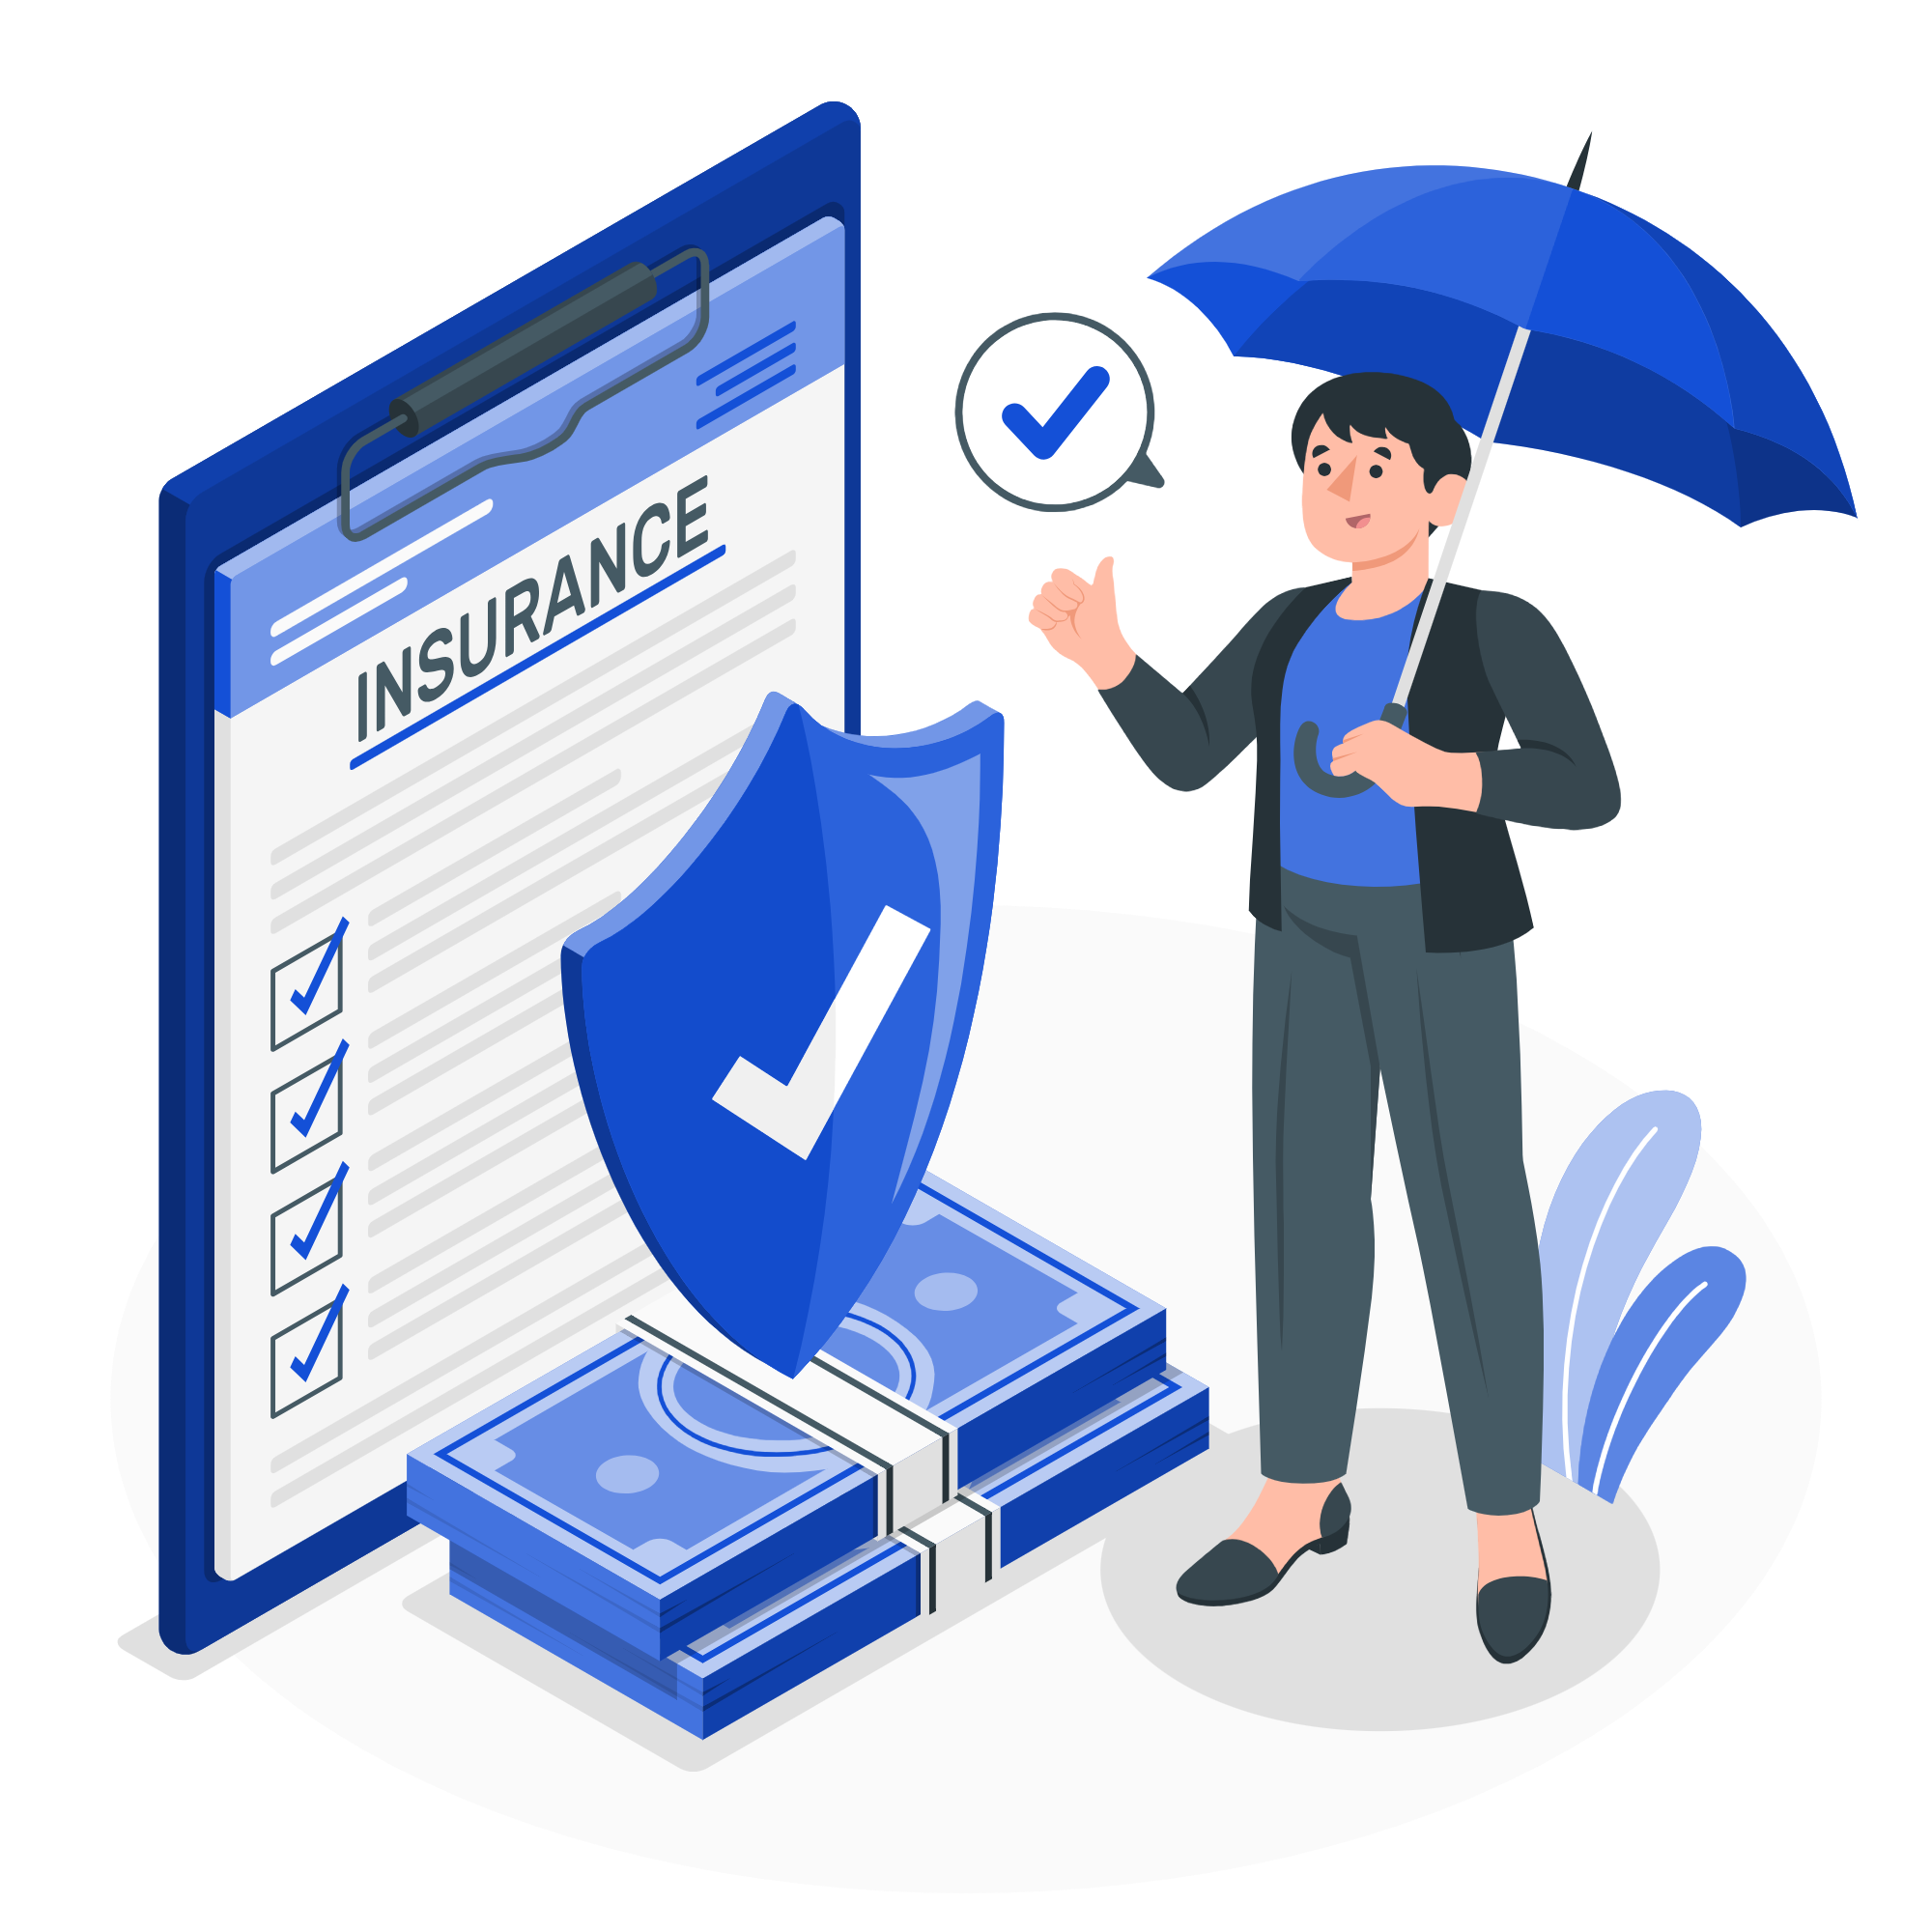

# Medical Insurance Price Prediction

<p style='font-size: 18px; line-height: 1.7'>
"Medical Insurance" We aim to predict medical insurance prices using machine learning techniques. The cost of medical insurance can vary significantly based on various factors such as age, BMI, smoking habits, region, and more. By leveraging a dataset containing information about individuals and their insurance charges, we will explore, preprocess, and analyze the data before building predictive models.
</p>

In [1]:
# All imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#1. reading external dataset
df= pd.read_csv('Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# display data info in terms of (type, and nullable)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
# shape
df.shape

(2772, 7)

In [5]:
# 2. varous statistics of the analytic data set
descriptive_statistics= df.describe()

In [6]:
descriptive_statistics

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


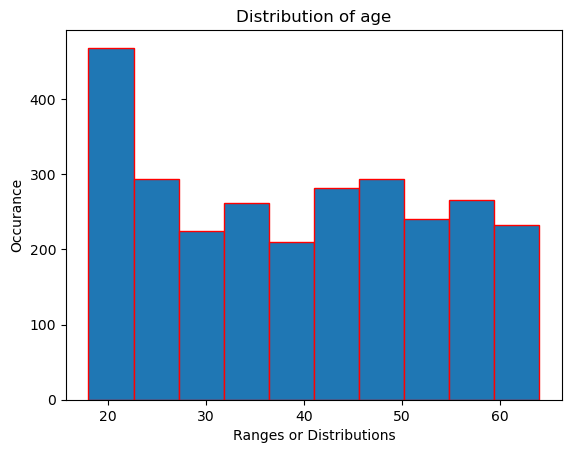

In [7]:
#3. Plot histograms for numerical variablee we get this distributions
plt.hist(data=df, x='age',bins=10,edgecolor='red')
plt.title("Distribution of age")
plt.xlabel("Ranges or Distributions")
plt.ylabel("Occurance")
plt.show()

#This graph illustrates the distribution of N_SOIL values and their respective ranges.

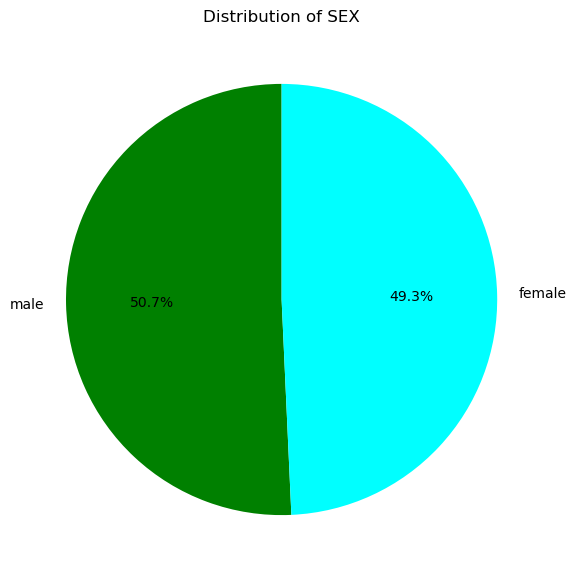

In [8]:
# Assuming 'df' is your DataFrame and it contains a column named 'media_posted'
colors_media = ['green' , 'cyan']
up_front_salary_counts = df['sex'].value_counts()

# Now you can use 'media_posted_counts' for your pie chart
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(up_front_salary_counts, labels=up_front_salary_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_media)
ax.set_title('Distribution of SEX')
plt.show()

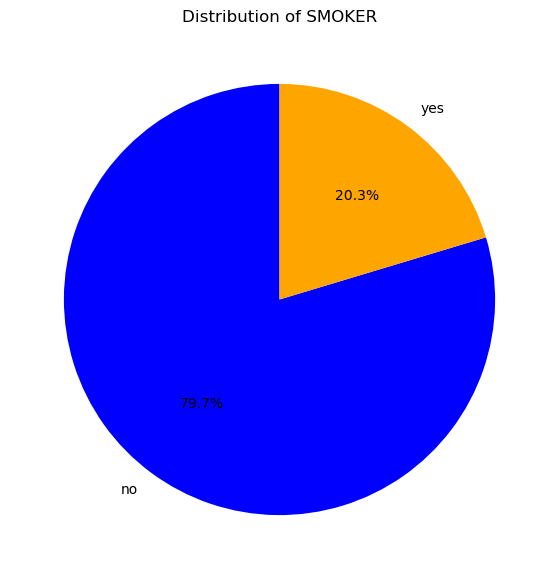

In [9]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Check the distribution of 'smoke' variable using value_counts()
# print(df['smoker'].value_counts())

# # If the variable exists and its distribution is understood, proceed with plotting
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x='smoker')
# plt.title('Distribution of Smoke Variable')
# plt.xticks(rotation=80)
# plt.show()


# Assuming 'df' is your DataFrame and it contains a column named 'media_posted'
colors_media = ['blue' , 'orange']
up_front_salary_counts = df['smoker'].value_counts()

# Now you can use 'media_posted_counts' for your pie chart
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(up_front_salary_counts, labels=up_front_salary_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_media)
ax.set_title('Distribution of SMOKER')
plt.show()

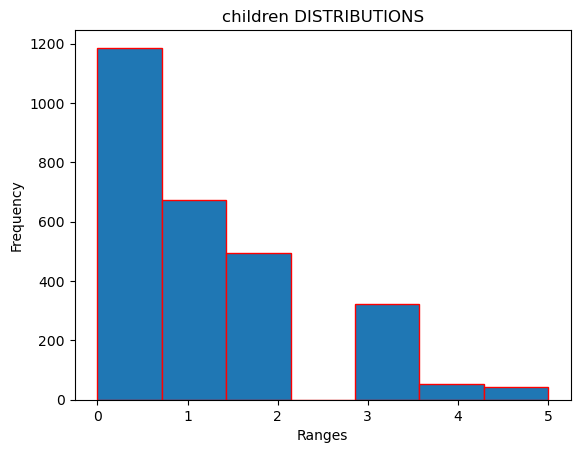

In [10]:
#3. Plot
df['children'].plot(kind='hist',bins=7,edgecolor='red')
plt.title("children DISTRIBUTIONS")
plt.xlabel("Ranges")
plt.show()

# This graph illustrates the most common temperature ranges and their respective frequencies in the dataset.


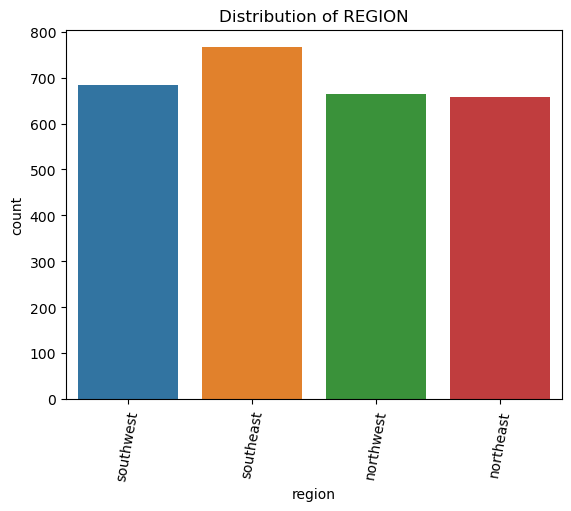

In [11]:
plt.figure.figsize=(12, 6)
sns.countplot(data=df, x = 'region')
plt.title('Distribution of REGION')
plt.xticks(rotation=80)
plt.show()

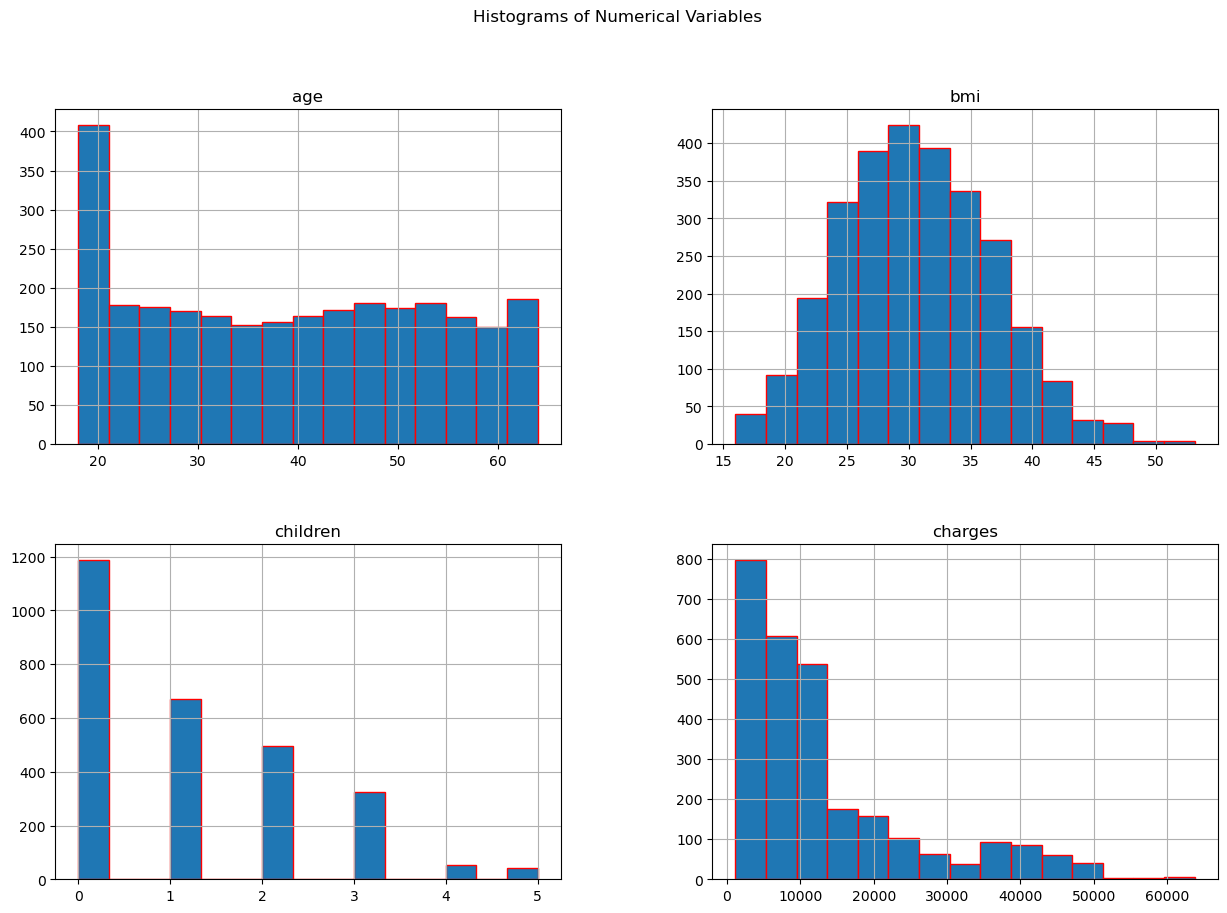

In [12]:
# displaying all numerical variabes (histogram distribution)
data= df.iloc[:,:7]
data.hist(bins=15, figsize=(15, 10),edgecolor='red')
plt.suptitle('Histograms of Numerical Variables')
plt.show()

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.674999999999994
47.31500000000001


In [16]:
# pip install feature-engine

<Axes: >

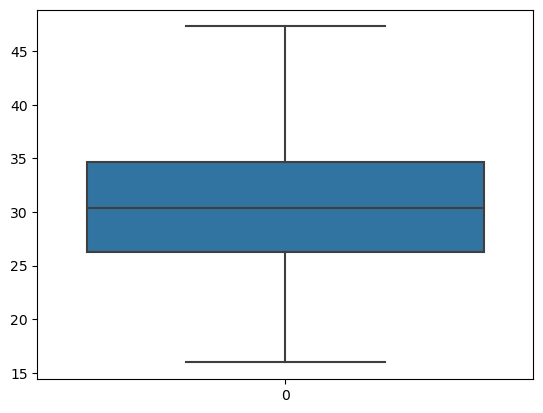

In [17]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [18]:
df['bmi'].skew()
df['age'].skew()

0.054780773126998195

In [19]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [20]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [21]:
# Assessing the correlations among numerical variables within the dataset.

numerical_columns=df.iloc[:, :6]
correlation = numerical_columns.corr()
correlation

,age,sex,bmi,children,smoker,region
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000


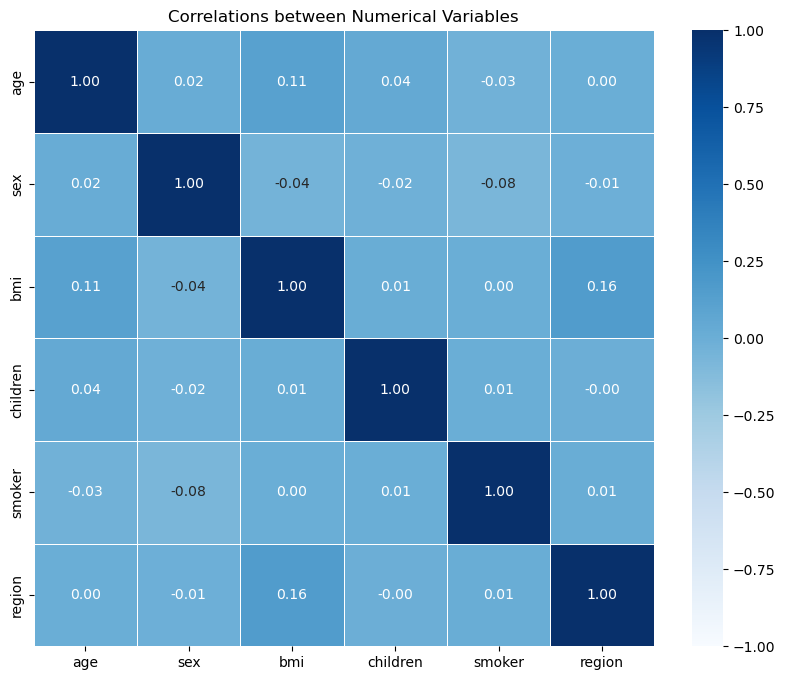

In [22]:
# Creating a correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Blues',vmin=-1, vmax=1, fmt='.2f',center=0,
           linewidth=.5)
plt.title('Correlations between Numerical Variables')
plt.show()

In [23]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print("The Score Of training Is: ",+lrmodel.score(xtrain,ytrain))
print("The Score Of test Is: ",+lrmodel.score(xtest,ytest))

The Score Of training Is:  0.7295415541376445
The Score Of test Is:  0.8062391115570589


In [25]:
# Formatting the scores (considering they are not typical "accuracies")
formatted_train_score = '{:.2f}'.format(model_train_score)
formatted_test_score = '{:.2f}'.format(model_test_score)

# Preparing labels and score values for plotting
labels = [f'Training Score {formatted_train_score}', f'Test Score {formatted_test_score}']
score_values = [model_train_score, model_test_score]

# Plotting
plt.bar(labels, score_values, color=['blue', 'orange'])

# Adjusting the limits to fit the negative scores, if needed
plt.ylim(min(score_values) - 0.05, max(score_values) + 0.05)  # Adjusting dynamically based on scores

plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.title('Model Score Comparison (Train vs Test)')
plt.show()


NameError: name 'model_train_score' is not defined

When we work the linear regression model, an accuracy of 73% is observed, indicating lower model performance. To address this concern, an alternative model, Support Vector Regression (SVR), is used to enhance prediction accuracy

In [26]:
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
model_train_accuracy=svrmodel.predict(xtrain)
model_test_accuracy=svrmodel.predict(xtest)
print("The Score Of Training Is: ",+r2_score(ytrain,model_train_accuracy))
print("The Score Of test Is: ",+r2_score(ytest,model_test_accuracy))

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Score Of Training Is:  -0.10151474302536445
The Score Of test Is:  -0.1344454720199666


In [32]:
model_train_accuracy = 0.9738163260247533
model_test_accuracy = 0.8819423353068565

formatted_train_score = '{:.2f}'.format(model_train_score)
formatted_test_score = '{:.2f}'.format(model_test_score)

labels = [f'Training Score {formatted_train_score}', f'Test Score {formatted_test_score}']
score_values = [model_train_score, model_test_score]

plt.bar(labels, score_values, color=['blue', 'orange'])
plt.ylim(min(score_values) - 0.05, max(score_values) + 0.05)  # Adjusting dynamically based on scores

plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.title('Model Score Comparison (Train vs Test)')
plt.show()

NameError: name 'model_train_score' is not defined

When we work the linear regression model, an accuracy of 73% is observed, indicating lower model performance. To address this concern, an alternative model, RandomForestRegressor, is used to enhance prediction accuracy

In [30]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
model_train_accuracy=rfmodel.predict(xtrain)
model_test_accuracy=rfmodel.predict(xtest)
print("The Score Of Training Is: ",+r2_score(ytrain,model_train_accuracy)*100)
print("The Score Of Testing Is: ",+r2_score(ytest,model_test_accuracy)*100)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The Score Of Training Is:  97.38163260247534
The Score Of Testing Is:  88.19423353068565


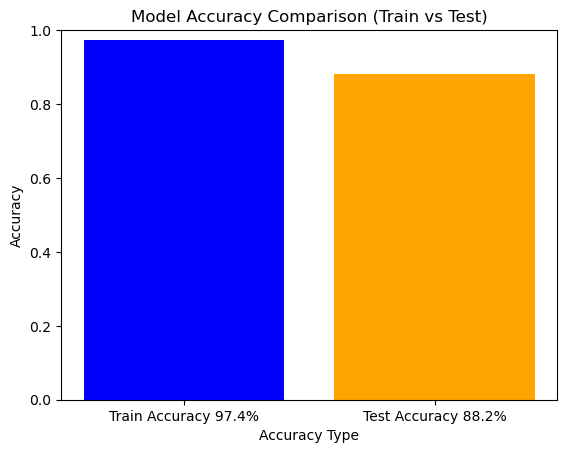

In [31]:
# Scores provided
model_train_accuracy = 0.9738163260247533
model_test_accuracy = 0.8819423353068565

# Formatting the accuracies as percentages
formatted_train_accuracy = '{:.1%}'.format(model_train_accuracy)
formatted_test_accuracy = '{:.1%}'.format(model_test_accuracy)

# Preparing labels and accuracy values for plotting
labels = [f'Train Accuracy {formatted_train_accuracy}', f'Test Accuracy {formatted_test_accuracy}']
accuracy_values = [model_train_accuracy, model_test_accuracy]

# Plotting
plt.bar(labels, accuracy_values, color=['blue', 'orange'])
plt.ylim(0, 1)  # Limiting between 0 and 1 for accuracy values

plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Train vs Test)')
plt.show()

In [39]:
# feature testing
features=np.array([[18,0,33.770,1,0,2]])
charge_predicted= rfmodel.predict(features)
charge_predicted

# streamlit run App.py

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2837.5950927])

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


# Model Saving using Pickle for Deployment Process

In [ ]:
import pickle
pickle.dump(rfmodel,open("insurance_model.pkl","wb"))